In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

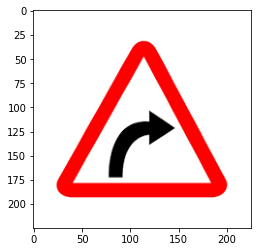

In [65]:
img = cv2.imread('right_sign.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


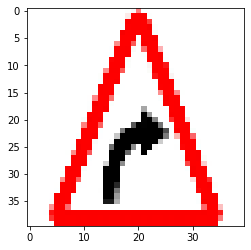

In [66]:
img = right('right_sign.jpg')
plt.imshow(img)

In [3]:
def sign_left(dir):
    img = plt.imread(dir)
    img = img[20:230,:,:]
    img = cv2.resize(img,dsize=(40, 40), interpolation=cv2.INTER_CUBIC)
    return img

def sign_right(dir):
    img = cv2.imread(dir , cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[30:190,:,:]
    img = cv2.resize(img,dsize=(40, 40), interpolation=cv2.INTER_CUBIC)
    return img


In [39]:
# dir = 'dataset/xy_104_128_000_13075ade-208a-11ec-b9ec-4c1d96ff72a1.jpg'
# orginal = plt.imread(dir)
# change = orginal.copy()

# #change[100:140, 100:140, :] = img

# plt.imshow(change)
# plt.show()

In [6]:
import glob
import os


def xyz(dir):
    x = int(dir.split("_")[1])
    y = int(dir.split("_")[2])
    z = int(dir.split("_")[3])
    return x, y, z


def off(x, y, sign_img, change):
    xoffset, yoffset = sign_img.shape[1]//2, sign_img.shape[0]//2
    xs = x - xoffset
    xe = x + xoffset
    ys = y - yoffset
    ye = y + yoffset

    for r in range(40):
        for i, j in zip(sign_img[:, :, :], change[ys:ye, xs:xe, :]):
            if (sum(i[r][1:3] == 255) != 2):  # 기호가 존재하는 부분에서만
                j[r] = i[r]  # 해당 기호 값을 원본 이미지로 가져온다.
    
    return change

# h W C


In [10]:
import glob
from uuid import uuid1


list = glob.glob('dataset/*.jpg')
left = sign_left('left_curve.jpg')
right = sign_right('right_sign.jpg')

## left = 0 / right = 1
for li in list:
    x, y, z = xyz(li)
    if 50 < x < 150 and z == 0 :
        road_img = plt.imread(li).copy()
        change_img = off(x, y, right, road_img)

        # 0 : left 1 : right binary classification. 
        plt.imsave('combine/xyz_%d_%d_%d_%d_%s.jpg' % (x, y, 1, 1, uuid1()), change_img)


In [41]:


# 0 : left 1 : right binary classification. 
plt.imsave('xyz_%d_%d_%d_%d_%s.jpg' %(x, y, 1, 0, uuid1()), change)